# Importing Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Augmentation 

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [4]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [18]:
x_train = train_datagen.flow_from_directory(r"C:\Users\Karthikeyan\Downloads\Flowers-Dataset\flowers\train",target_size=(128,128),batch_size=32,class_mode="categorical")


Found 3451 images belonging to 5 classes.


In [19]:
x_test=x_test = test_datagen.flow_from_directory(r"C:\Users\Karthikeyan\Downloads\Flowers-Dataset\flowers\test",target_size=(128,128),batch_size=32,class_mode="categorical")

Found 866 images belonging to 5 classes.


In [20]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# Creating Model

In [21]:
model = Sequential()

# Adding Layers

In [22]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [23]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [24]:
model.add(Flatten())

In [31]:
model.add(Dense(units=200,kernel_initializer="random_uniform",activation="relu"))

In [32]:
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))

In [33]:
model.add(Dense(units=400,kernel_initializer="random_uniform",activation="relu"))

In [30]:
model.add(Dense(units=500,kernel_initializer="random_uniform",activation="relu"))

In [34]:
model.add(Dense(units=5,kernel_initializer="random_uniform",activation="softmax"))

# Compiling Model 

In [35]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

# Fitting the Model

In [37]:
model.fit_generator(x_train,steps_per_epoch=39,epochs=25,validation_data=x_test,validation_steps=10)

C:\Users\Karthikeyan\AppData\Local\Temp\ipykernel_14112\3505885595.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=39,epochs=25,validation_data=x_test,validation_steps=10)


Epoch 1/25
39/39 [==============================] - 50s 1s/step - loss: 1.5990 - accuracy: 0.2486 - val_loss: 1.5958 - val_accuracy: 0.2594
Epoch 2/25
39/39 [==============================] - 36s 914ms/step - loss: 1.5964 - accuracy: 0.2476 - val_loss: 1.6038 - val_accuracy: 0.2219
Epoch 3/25
39/39 [==============================] - 36s 913ms/step - loss: 1.5932 - accuracy: 0.2500 - val_loss: 1.6053 - val_accuracy: 0.2188
Epoch 4/25
39/39 [==============================] - 35s 878ms/step - loss: 1.5996 - accuracy: 0.2179 - val_loss: 1.5977 - val_accuracy: 0.2438
Epoch 5/25
39/39 [==============================] - 39s 993ms/step - loss: 1.5987 - accuracy: 0.2542 - val_loss: 1.6019 - val_accuracy: 0.2156
Epoch 6/25
39/39 [==============================] - 70s 2s/step - loss: 1.5955 - accuracy: 0.2446 - val_loss: 1.6018 - val_accuracy: 0.2531
Epoch 7/25
39/39 [==============================] - 43s 1s/step - loss: 1.6017 - accuracy: 0.2420 - val_loss: 1.6017 - val_accuracy: 0.2313
Epoch 8/

# Saving the Model

In [57]:
model.save("flowers.h5")

# Testing the Model

In [40]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [41]:
model=load_model("flowers.h5")

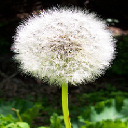

In [49]:
img=image.load_img(r"C:\Users\Karthikeyan\Downloads\Flowers-Dataset\flowers\flower.jpg",target_size=(128,128))
img

In [50]:
x=image.img_to_array(img)
x

array([[[  2.,   2.,   0.],
        [  2.,   2.,   0.],
        [  2.,   2.,   0.],
        ...,
        [  2.,   1.,   0.],
        [  2.,   1.,   0.],
        [  2.,   1.,   0.]],

       [[  4.,   3.,   1.],
        [  4.,   3.,   1.],
        [  4.,   3.,   1.],
        ...,
        [  2.,   1.,   0.],
        [  2.,   1.,   0.],
        [  2.,   1.,   0.]],

       [[  5.,   1.,   0.],
        [  6.,   2.,   1.],
        [  6.,   2.,   1.],
        ...,
        [  2.,   1.,   0.],
        [  2.,   1.,   0.],
        [  2.,   1.,   0.]],

       ...,

       [[ 62., 109.,   3.],
        [ 72., 125.,   0.],
        [ 94., 147.,   3.],
        ...,
        [105., 160.,   6.],
        [ 91., 147.,   0.],
        [116., 176.,   0.]],

       [[ 88., 141.,   0.],
        [ 94., 149.,   0.],
        [109., 165.,   0.],
        ...,
        [110., 167.,   0.],
        [107., 163.,   0.],
        [134., 189.,   8.]],

       [[ 79., 125.,   0.],
        [107., 161.,  24.],
        [115., 1

In [51]:
x.shape

(128, 128, 3)

In [52]:
x = np.expand_dims(x,axis=0)
x.shape

(1, 128, 128, 3)

In [53]:
pred_prob=model.predict(x)
pred_prob

1/1 [==============================] - 5s 5s/step


array([[0.17055237, 0.2510295 , 0.18373464, 0.17030248, 0.22438103]],
      dtype=float32)

In [55]:
class_name=["daisy","dandelion","rose","sunflower","tulip"]
pred_id=pred_prob.argmax(axis=1)[0]
pred_id

1

In [56]:
print("Predicted Flower is ",str(class_name[pred_id]))


Predicted Flower is  dandelion
